In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

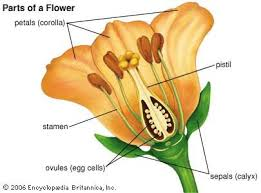

<h1>
In this imgage you can see what is sepal and petal
</h1>

In [19]:
data = load_iris()
# print(data)
x = data['data']
y = data['target']
dataset = pd.DataFrame(x, columns = data['feature_names'])
dataset['target'] = y = data['target']

<h1> FEATURE ENGINEERING</h1>
    <h2>EDA</h2>

### steps:
###    1)check for missing rows
###    2) check for rows with all the columns missing.
###     3) check for columns which are duplicate columns.
###     4)do feature selection[when we have veryy high number of columns need to do feature selection to get only necessary columns]
###     5)impute values for missing data.
###     6)PCA [feature extraction]


In [29]:
for columns in dataset.columns:
    print(dataset[columns].nunique())
    print(dataset[columns].unique())

35
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
23
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
43
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
22
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
3
[0 1 2]


In [23]:
dataset.info()
# observation: As here we are having 150 rows and in all the columns we have 150 that basically describe that we don't have any missing values, if any missing values
#              was there then it would have been converted to object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<h1>Performing uni-variate analysis</h1>
[Testing with specific columns w.r.t to output column whether it has any relationship or not and again with other columns whether with one column 
do we have any relationship with other column or not]

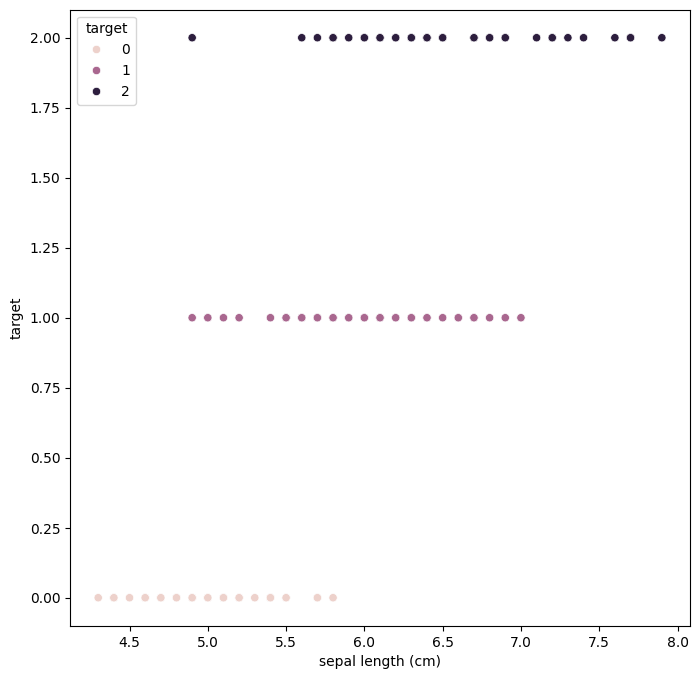

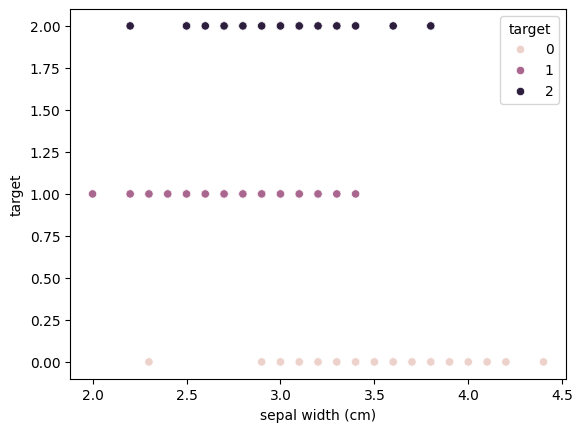

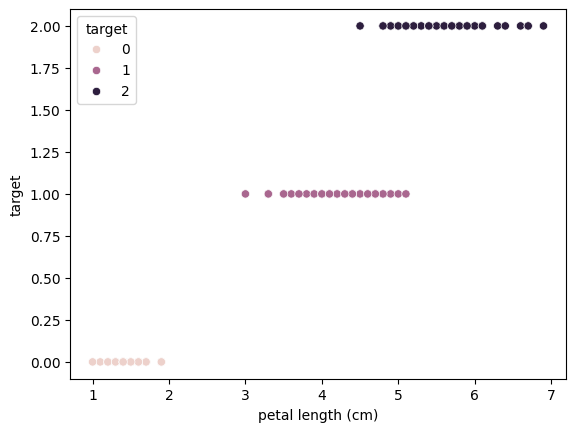

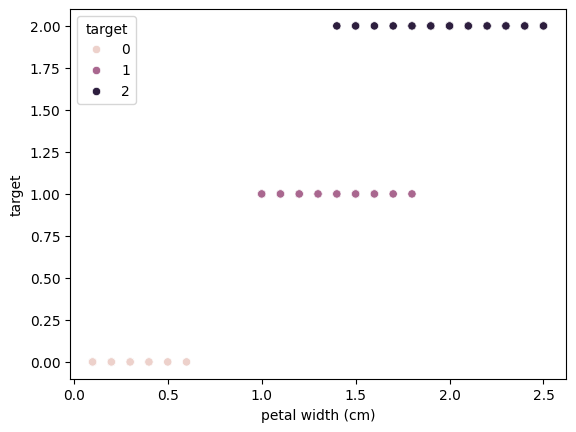

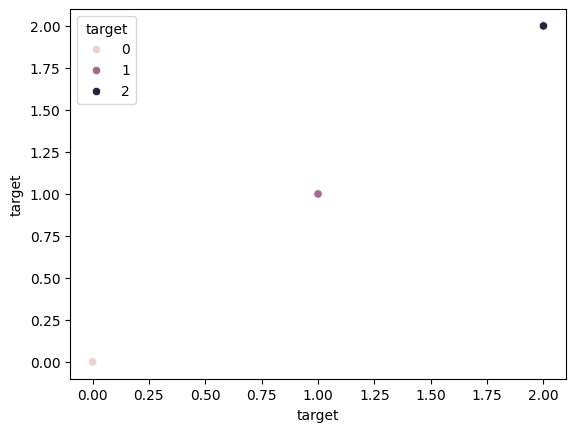

In [30]:
plt.figure(figsize=(8,8))
for columns in dataset.columns:
    sns.scatterplot(x = columns, y='target', data=dataset, hue='target')
    plt.show()

<h2>pair plot to check the relationship of each column w.r.t to other columns</h2>


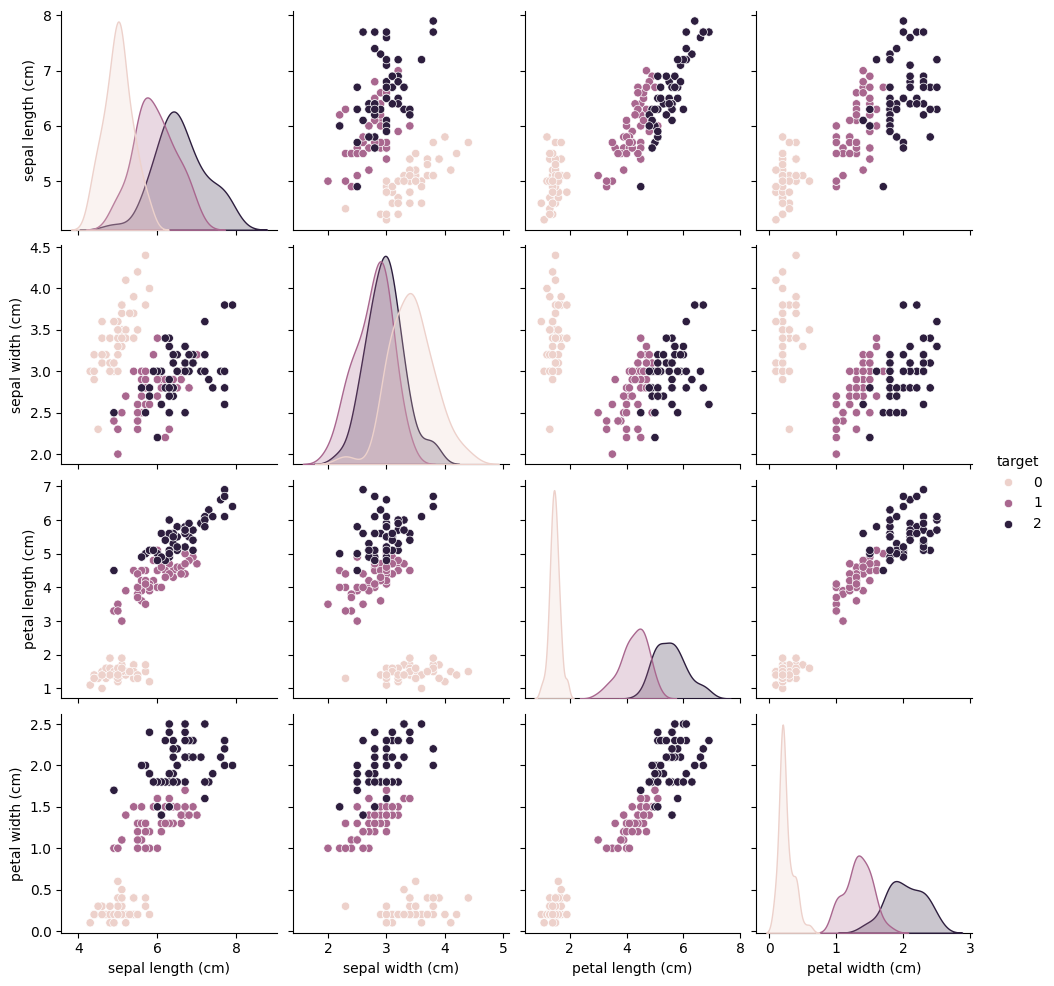

In [36]:
# plt.figure(figsize=(8,8))
# sns.scatterplot(x = columns, y='target', data=dataset, hue='target')?
# plt.show()
sns.pairplot(data=dataset,hue='target')

In [37]:
dataset.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<h1>{'setosa':0, 'versicolor':1, 'virginica':2}</h1>

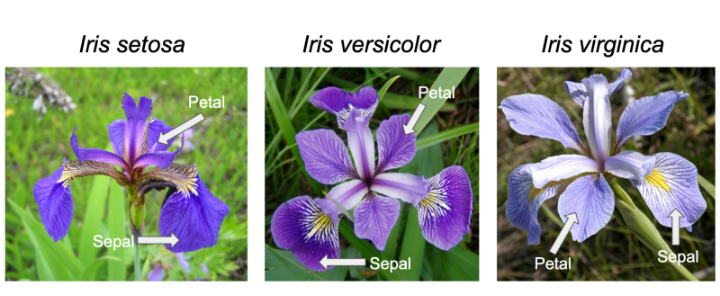


<h1>
In this image you can see what is the difference between setosa, verginica and versicolor flower
</h1>

<h3>
<ol>
<li> with this analysis we get that sepal len and sepal width are negatively co-related, as with increase in sepal width, sepal length decreases</li>
<li> Here if we see the pairplot we get to see that the setosa flower is clearly separable, this denotes that the values of setosa flower or sepal length, sepal width, petal length, petal width are all different than virginica and versicolor. setosa flower have different features w.r.t to these features. </li>
<li>virginica and versicolor are more closely corelated to each other, their features are similar but are different when we dig deep.</li>
<li>petal length and petal width are highly correlated.</li>
</ol>
</h3>